In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [33]:
data = pd.read_csv("/kaggle/input/language-detection/Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [35]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [36]:
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

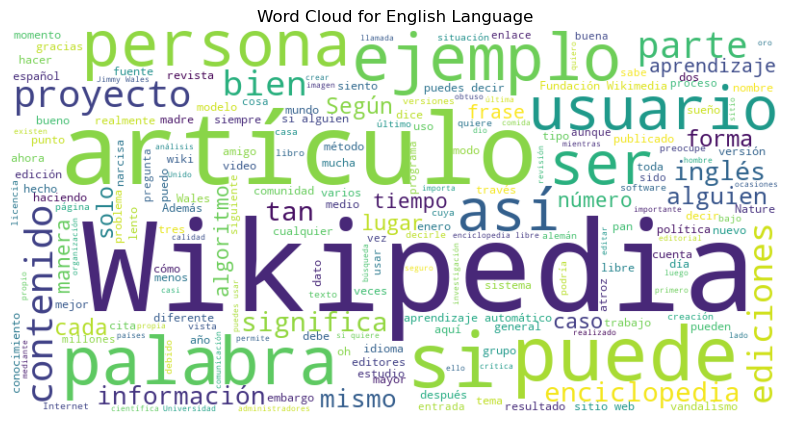

In [38]:
text = " ".join(data[data['Language'] == 'Spanish']['Text'])
text

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('spanish'))).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Word Cloud for English Language')
plt.axis('off')
plt.show()

In [39]:
text = " ".join(data[data['Language'] == 'English']['Text'])
text = text.lower()
words = text.split()

words = [word for word in words if word not in set(stopwords.words('english'))]
word_freq = nltk.FreqDist(words)
common_words = word_freq.most_common(10)

words
common_words

[('wikipedia', 250),
 ('learning', 139),
 ('machine', 92),
 ('also', 72),
 ('one', 63),
 ('data', 63),
 ('articles', 60),
 ('use', 56),
 ('like', 50),
 ("i'm", 50)]

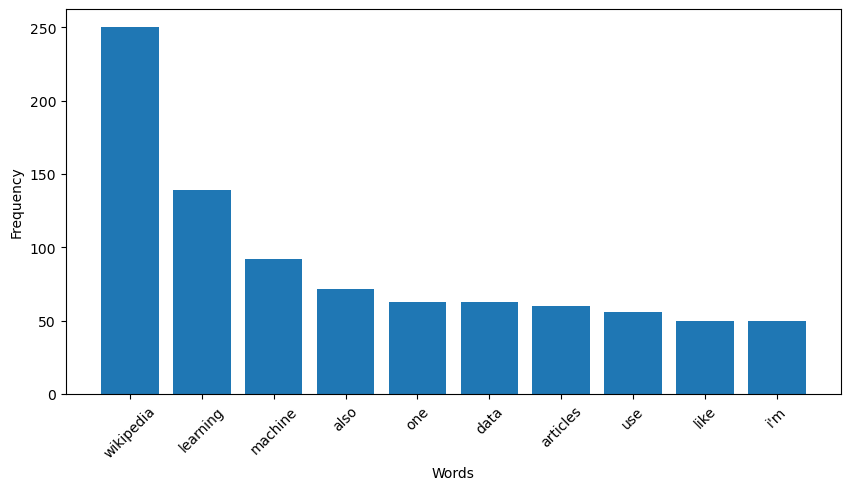

In [40]:
x_values,y_values = zip(*common_words)
plt.figure(figsize=(10,5))

plt.bar(x_values,y_values)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data["Text"], 
                                                    data["Language"], 
                                                    test_size=0.33, 
                                                    stratify=data["Language"],
                                                    random_state=42)


cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9742086752637749


In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9742086752637749
Classification report:
               precision    recall  f1-score   support

      Arabic       1.00      0.97      0.98       177
      Danish       1.00      0.95      0.97       141
       Dutch       1.00      0.98      0.99       180
     English       0.87      1.00      0.93       457
      French       0.98      0.99      0.99       335
      German       1.00      0.97      0.98       155
       Greek       1.00      0.97      0.98       121
       Hindi       1.00      0.95      0.98        21
     Italian       1.00      0.97      0.98       230
     Kannada       1.00      0.94      0.97       122
   Malayalam       0.99      0.99      0.99       196
  Portugeese       1.00      0.98      0.99       244
     Russian       1.00      0.96      0.98       228
     Spanish       0.99      0.97      0.98       270
    Sweedish       0.98      0.98      0.98       223
       Tamil       1.00      0.99      0.99       155
     Turkish       1.00     

In [43]:
user_text = "Wie geht es dir"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: German


In [45]:
user_text = "C'est du français"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: French


In [46]:
user_text = "как жизнь"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: Russian


In [47]:
user_text = "كيف حالك؟"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: Arabic


In [48]:
user_text = "como vai"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: Portugeese


In [49]:
user_text = "आप कैसे हैं"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: Hindi


In [50]:
user_text = "Hur mår du"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: Sweedish


In [51]:
user_text = "hvordan har du det"

user_data = cv.transform([user_text])

prediction = model.predict(user_data)

predicted_language = prediction[0]

print("The detected language is:", predicted_language)

The detected language is: Danish
